<a href="https://colab.research.google.com/github/dpostolovski/eeg_is/blob/fourier_analysis/IS_project_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>
  <img alt="FINKI **LOGO**" height="30px" src="https://www.finki.ukim.mk/Content/dataImages/downloads/logo-large-500x500_2.png" hspace="10px" vspace="0px">
  Интелигентни системи - Лабораториска вежба 2 (Претпроцесирање)
</h1>
<center><h3><i>Група 5<i><h3></center>

---



In [5]:
#@title Монтирање на Google Drive податочниот систем
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
#@title Инсталирање и вчитување на потребните библиотеки

# Библиотека за истражување, визуелизација и анализирање на човечки 
# неврофизиолошки податоци (EEG, sEEG и др)
!pip install mne 
!pip install termcolor

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
from termcolor import colored
import mne
from sklearn.decomposition import PCA, FastICA

     |████████████████████████████████| 6.6MB 5.7MB/s 


In [3]:
%tensorflow_version 1.12.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.12.0`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [2]:
!wget "https://raw.githubusercontent.com/vlawhern/arl-eegmodels/master/EEGModels.py"

--2020-05-07 20:19:55--  https://raw.githubusercontent.com/vlawhern/arl-eegmodels/master/EEGModels.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18283 (18K) [text/plain]
Saving to: ‘EEGModels.py’

EEGModels.py        100%[===================>]  17.85K  --.-KB/s    in 0.005s  

2020-05-07 20:19:55 (3.20 MB/s) - ‘EEGModels.py’ saved [18283/18283]



In [30]:
#@title Fourier analysis
# Вчитување на податоците

from sklearn import metrics 
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint 
from sklearn.model_selection import train_test_split
from EEGModels import EEGNet,ShallowConvNet
import scipy.io as sio
from scipy.fft import fft
from scipy import signal
from tensorflow.keras.utils import to_categorical
import os
from tensorflow.keras import backend as K
K.set_image_data_format('channels_first')
data = sio.loadmat('drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainData.mat')['trainData'] 


print(open("/root/.keras/keras.json").read())

# Вчитување на label-ите
labels_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainLabels.txt", "r") as file_labels:
    labels_arr = file_labels.read().splitlines()

# Вчитување на редоследот на светкање
events_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainEvents.txt", "r") as file_events:
    events_arr = file_events.read().splitlines()

# Вчитување на редоследот на објекти кои се target
targets_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainTargets.txt", "r") as file_targets:
    targets_arr = file_targets.read().splitlines()

# Прилагодување на податоците за користење со mne библиотеката
ch_names = ["C3", "Cz", "C4", "CPz", "P3", "Pz", "P4", "POz"]
ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']

mne_array = np.swapaxes(data, 0, 2) # (епохa, канал, настан). 
mne_array = np.swapaxes(mne_array, 1, 2) # (епохa, канал, настан). 
#raw_data = mne.epochs.EpochsArray(mne_array, mne_info)

if data.shape[0] == 8:
  print("Податоците се успешно вчитани.")
else:
  print("Настана грешка во вчитувањето на податоците.")

mne_array = standardized_data.reshape([1600,1,8, 350])
print(mne_array.shape)

#stft = mne.time_frequency.stft(mne_array[0], 24)

# Number of sample points

FS = 250
N = 350
# sample spacing
T = 1.0 / FS
x = np.linspace(0.0, N*T, N)
num_labels= 8
#plt.plot(mne_array[2][2], np.linspace(0.0,N,N))

#fig, axs = plt.subplots(8,8, figsize=(4*8,4*8))
#freq_data = list()
#for i in range(8):
#  for x in range(8):
#    f, t, Sxx = signal.spectrogram(mne_array[x][i], fs=FS, nperseg=50, window=('hamming'), noverlap=35)
#    freq_data.append(Sxx)
#    axs[i,x].pcolormesh(t, f, Sxx)
#plt.show()
#print(open("~/keras/keras.json").read())

#events_arr = list(map(int, events_arr))


X_train, X_test, y_train, y_test = train_test_split(mne_array, events_arr, test_size=0.33, random_state=42)


#y_train = np.array(y_train)
y_train = to_categorical(y_train)
#y_test = np.array(y_test)
y_test = to_categorical(y_test)
# Construct model 


num_epochs = 50
num_batch_size = 10

model = EEGNet(nb_classes = 9, Chans = 8, Samples = 350)
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'],optimizer = 'adam')
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)

start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, \
          validation_data=(X_test, y_test),callbacks=[checkpointer], verbose=1)

score = model.evaluate(X_test, y_test, verbose=1)
#preds = model.predict(X_test, verbose=0)
#acc = accuracy_score(y_test, preds)

print("accuracy_score: {f}".format(f=score))


{
    "epsilon": 1e-07, 
    "floatx": "float32", 
    "image_data_format": "channels_last", 
    "backend": "tensorflow"
}
Податоците се успешно вчитани.
(1600, 1, 8, 350)
Epoch 1/50
103/108 [===========================>..] - ETA: 0s - loss: 2.1641 - accuracy: 0.1291
Epoch 00001: val_loss improved from inf to 2.16962, saving model to saved_models/weights.best.basic_mlp.hdf5
108/108 [==============================] - 1s 10ms/step - loss: 2.1638 - accuracy: 0.1297 - val_loss: 2.1696 - val_accuracy: 0.1477
Epoch 2/50
104/108 [===========================>..] - ETA: 0s - loss: 2.1151 - accuracy: 0.1663
Epoch 00002: val_loss improved from 2.16962 to 2.13560, saving model to saved_models/weights.best.basic_mlp.hdf5
108/108 [==============================] - 1s 9ms/step - loss: 2.1152 - accuracy: 0.1651 - val_loss: 2.1356 - val_accuracy: 0.1610
Epoch 3/50
104/108 [===========================>..] - ETA: 0s - loss: 2.0838 - accuracy: 0.1952
Epoch 00003: val_loss improved from 2.13560 to 2.12263

In [0]:
!readlink -f ~/.keras/keras.json

/root/.keras/keras.json


--2020-05-07 19:08:10--  https://raw.githubusercontent.com/vlawhern/arl-eegmodels/master/EEGModels.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18283 (18K) [text/plain]
Saving to: ‘EEGModels.py’

EEGModels.py        100%[===================>]  17.85K  --.-KB/s    in 0.01s   

2020-05-07 19:08:10 (1.43 MB/s) - ‘EEGModels.py’ saved [18283/18283]



(8, 350, 100)
(8, 350, 200)


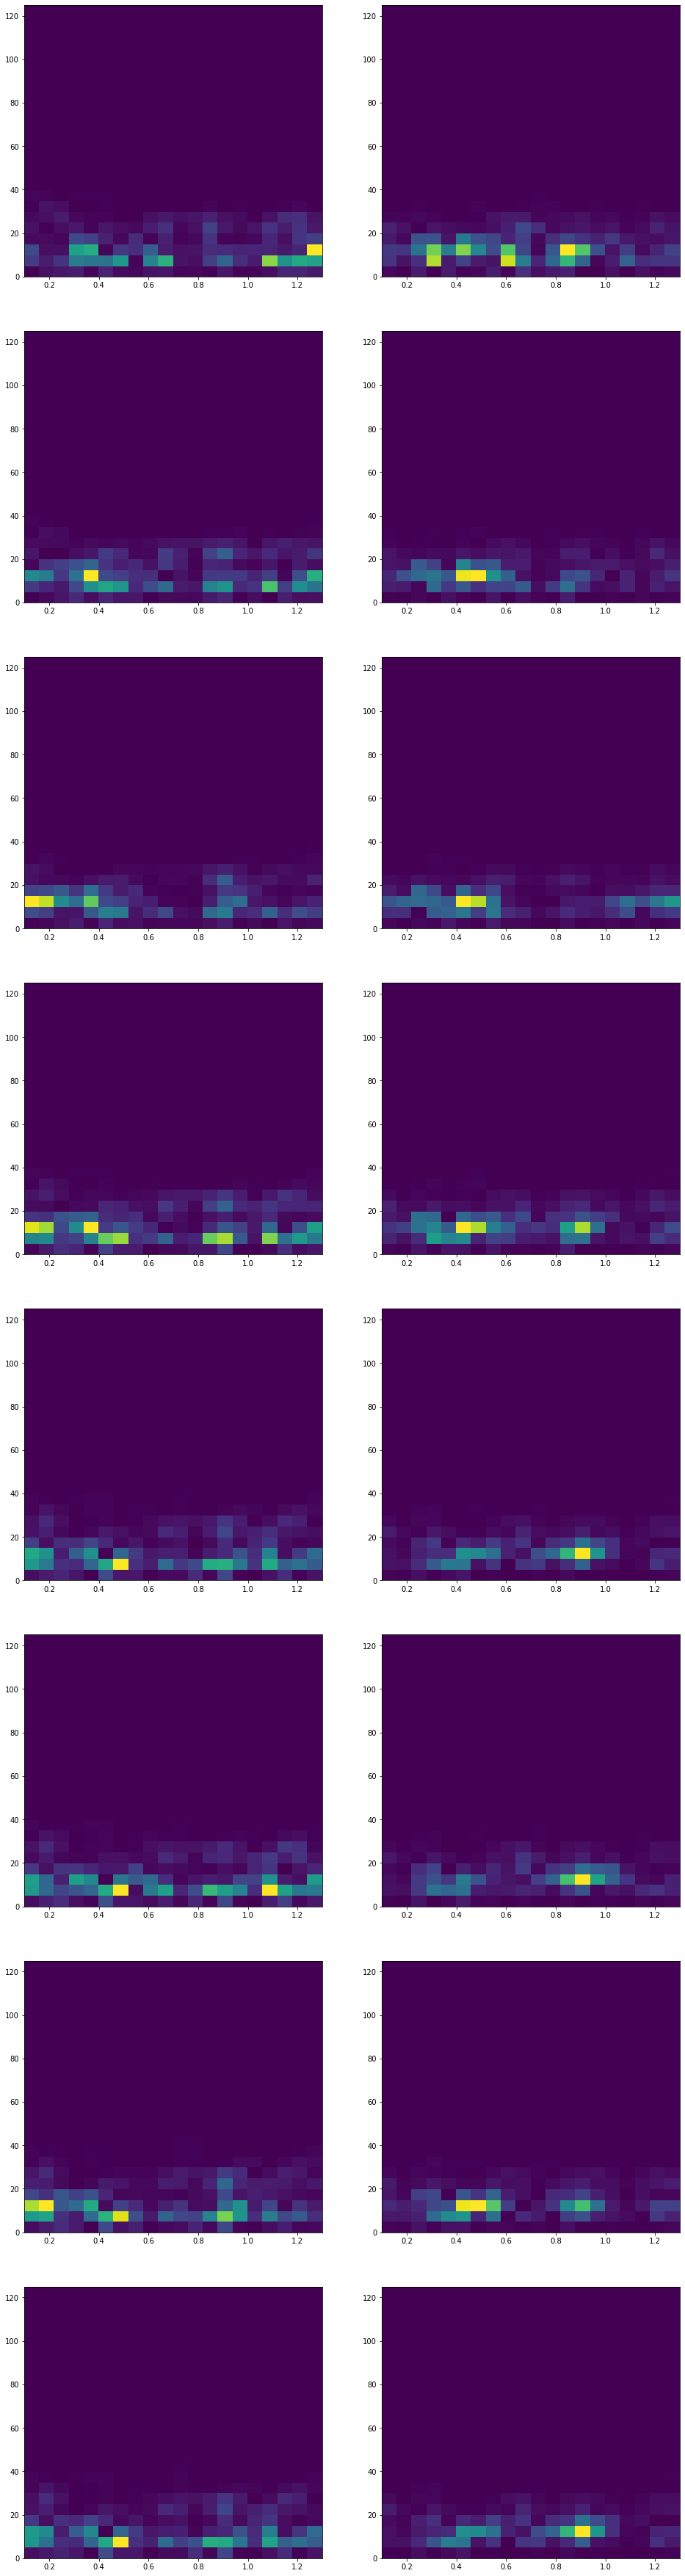

In [0]:
#@title 1st objest, target vs non target
# Вчитување на податоците
data = loadmat('drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainData.mat')['trainData'] 

# Вчитување на label-ите
labels_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainLabels.txt", "r") as file_labels:
    labels_arr = file_labels.read().splitlines()

# Вчитување на редоследот на светкање
events_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainEvents.txt", "r") as file_events:
    events_arr = file_events.read().splitlines()

# Вчитување на редоследот на објекти кои се target
targets_arr = []
with open("drive/My Drive/Интелигентни Системи/Data/SBJ01/S01-Train/trainTargets.txt", "r") as file_targets:
    targets_arr = file_targets.read().splitlines()

# Прилагодување на податоците за користење со mne библиотеката
ch_names = ["C3", "Cz", "C4", "CPz", "P3", "Pz", "P4", "POz"]
ch_types = ['eeg','eeg','eeg','eeg','eeg','eeg','eeg','eeg']
mne_info = mne.create_info(ch_names=ch_names, sfreq=250, ch_types=ch_types)
#mne_array = np.swapaxes(data, 0, 2) # (епохa, канал, настан). 
#mne_array = np.swapaxes(mne_array, 1, 2) # (епохa, канал, настан). 
#raw_data = mne.epochs.EpochsArray(mne_array, mne_info)

# Извлекување на настаните каде светнал првиот објект и бил target.
first_object_events_target = [index for index, value in enumerate(events_arr) if value == '1']
first_object_non_target = [index for index, value in enumerate(events_arr) if value == '1']

for event_pos in first_object_events_target:
  if targets_arr[event_pos] == 1:
    first_object_non_target.remove(event_pos)
    continue # Продолжи
  else:
    first_object_events_target.remove(event_pos) # Избриши -> Објектот не е target
first_object_target_eeg_data = np.zeros((8,350, len(first_object_events_target)))
first_object_non_target_eeg_data = np.zeros((8,350, len(first_object_non_target)))
for channel in range(0, 8): # Секој канал
  for epoch in range(0, 350): # Секоја епоха
    i = 0
    for event in first_object_events_target: # Настан
      first_object_target_eeg_data[channel][epoch][i] = data[channel][epoch][event]
      i = i+1
    
    k=0
    for event in first_object_non_target: # Настан
      first_object_non_target_eeg_data[channel][epoch][i] = data[channel][epoch][event]
      k = k+1

print(first_object_target_eeg_data.shape)
print(first_object_non_target_eeg_data.shape)

first_object_target_eeg_data = np.mean(first_object_target_eeg_data, axis=2)
first_object_non_target_eeg_data = np.mean(first_object_non_target_eeg_data, axis=2)

fig, axs = plt.subplots(8,2,figsize=(16,16*4))
for i in range(8):
  f, t, Sxx = signal.spectrogram(first_object_target_eeg_data[i], fs=FS, nperseg=50, window=('hamming'), noverlap=35)
  fnon, tnon, Sxxnon = signal.spectrogram(first_object_non_target_eeg_data[i], fs=FS, nperseg=50, window=('hamming'), noverlap=35)

  axs[i,0].pcolormesh(t, f, Sxx)
  axs[i,1].pcolormesh(tnon, fnon, Sxxnon)
plt.show()